In [ ]:

# PREPROCESSING PIPELINE

import pandas as pd
import numpy as np
from pathlib import Path


file_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/Student Insomnia and Educational Outcomes Dataset_version-2.csv"
save_clean_csv = True
out_dir = Path("/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out")
out_dir.mkdir(parents=True, exist_ok=True)
clean_path = out_dir / "clean_dataset.csv"

# --- LOAD ---
df_raw = pd.read_csv(file_path)


df = df_raw.copy()
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

# --- Column aliases ) ---
col_year   = "1. What is your year of study?"
col_gender = "2. What is your gender?"
col_diff   = "3. How often do you have difficulty falling asleep at night? "
col_hours  = "4. On average, how many hours of sleep do you get on a typical day?"
col_awake  = "5. How often do you wake up during the night and have trouble falling back asleep?"
col_squal  = "6. How would you rate the overall quality of your sleep?"
col_conc   = "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?"
col_fatigue= "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?"
col_miss   = "9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?"
col_impact = "10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?"
col_device = "11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?"
col_caff   = "12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?"
col_pa     = "13. How often do you engage in physical activity or exercise?"
col_stress = "14. How would you describe your stress levels related to academic workload?"
col_acad   = "15. How would you rate your overall academic performance (GPA or grades) in the past semester?"

# --- Canonical category mappings ---
# Sleep quality (ordinal: Very poor → Very good)
sleep_quality_order = ["Very poor", "Poor", "Average", "Good", "Very good"]
sleep_quality_to_ord = {k:i+1 for i,k in enumerate(sleep_quality_order)} 

# Stress (ordinal)
stress_order = ["No stress", "Low stress", "High stress", "Extremely high stress"]
stress_to_ord = {k:i+1 for i,k in enumerate(stress_order)}  

# Academic performance (ordinal)
acad_order = ["Poor", "Below Average", "Average", "Good", "Excellent"]
acad_to_ord = {k:i+1 for i,k in enumerate(acad_order)}       

# Sleep hours band → midpoint (float)
def hours_band_to_midpoint(x: str) -> float:
    x = x.strip()
    if x == "Less than 4 hours":  return 3.5
    if x == "4-5 hours":          return 4.5
    if x == "6-7 hours":          return 6.5
    if x == "7-8 hours":          return 7.5
    if x == "More than 8 hours":  return 8.5
    return np.nan  


t = pd.DataFrame({
    "timestamp": df["Timestamp"],
    "year": df[col_year],
    "gender": df[col_gender],
    "sleep_hours_band": df[col_hours],
    "sleep_quality": df[col_squal],
    "stress": df[col_stress],
    "academic_performance": df[col_acad]
})

# numeric encodings 
t["sleep_hours"] = t["sleep_hours_band"].map(hours_band_to_midpoint)
t["sleep_quality_ord"] = t["sleep_quality"].map(sleep_quality_to_ord)
t["stress_ord"] = t["stress"].map(stress_to_ord)
t["acad_perf_ord"] = t["academic_performance"].map(acad_to_ord)

# --- Checks ---
print("Loaded:", df.shape)
print("\n Missing values (top 10):")
print(t[["sleep_hours","sleep_quality","sleep_quality_ord","stress","stress_ord","academic_performance","acad_perf_ord"]]
      .isnull().mean().sort_values(ascending=False).head(10))

print("\n Sample encoded data:")
print(t[["sleep_hours","sleep_quality_ord","stress_ord","acad_perf_ord"]].head(10))


if save_clean_csv:
    t.to_csv(clean_path, index=False)
    print(f"\n Clean dataset saved → {clean_path}")


Loaded: (996, 16)

 Missing values (top 10):
sleep_hours             0.0
sleep_quality           0.0
sleep_quality_ord       0.0
stress                  0.0
stress_ord              0.0
academic_performance    0.0
acad_perf_ord           0.0
dtype: float64

 Sample encoded data:
   sleep_hours  sleep_quality_ord  stress_ord  acad_perf_ord
0          7.5                  4           3              3
1          7.5                  4           2              4
2          7.5                  4           3              2
3          8.5                  2           4              5
4          7.5                  5           2              3
5          7.5                  5           3              2
6          7.5                  4           1              4
7          8.5                  4           2              4
8          8.5                  3           4              3
9          8.5                  5           3              1

 Clean dataset saved → /Users/muthuraj/Desktop/gi

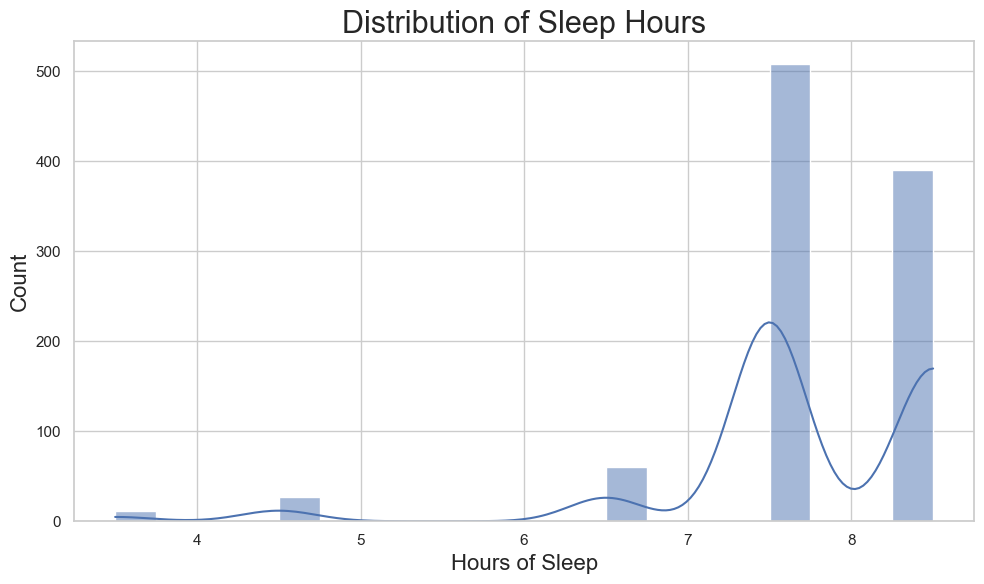

In [ ]:

# EDA: Distribution of Sleep Hours

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


clean_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out/clean_dataset.csv"
t = pd.read_csv(clean_path)

sns.set(style="whitegrid", rc={"axes.titlesize":22, "axes.labelsize":16})
plt.figure(figsize=(10,6))
sns.histplot(t["sleep_hours"], bins=20, kde=True)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/var/folders/3v/32nqqfz923b6r07wcgtx3s6r0000gn/T/ipykernel_32530/1497057683.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=t, x="sleep_quality", order=order, palette="Blues")


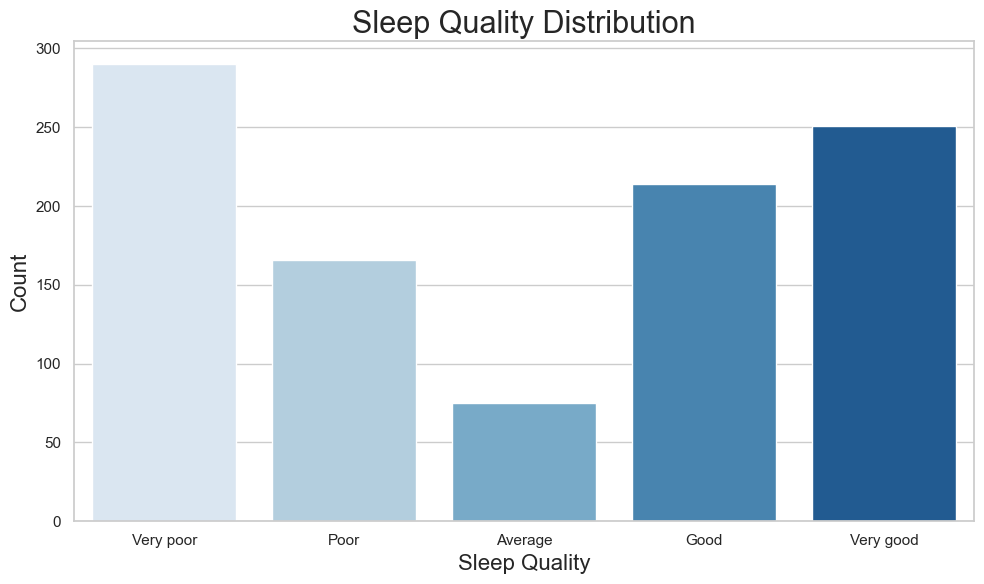

In [ ]:

# EDA: Sleep Quality Distribution

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clean_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out/clean_dataset.csv"
t = pd.read_csv(clean_path)

order = ["Very poor", "Poor", "Average", "Good", "Very good"]
sns.set(style="whitegrid", rc={"axes.titlesize":22, "axes.labelsize":16})
plt.figure(figsize=(10,6))
sns.countplot(data=t, x="sleep_quality", order=order, palette="Blues")
plt.title("Sleep Quality Distribution")
plt.xlabel("Sleep Quality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/var/folders/3v/32nqqfz923b6r07wcgtx3s6r0000gn/T/ipykernel_32530/3570285533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=t, x="academic_performance", order=acad_order, palette="Greens")


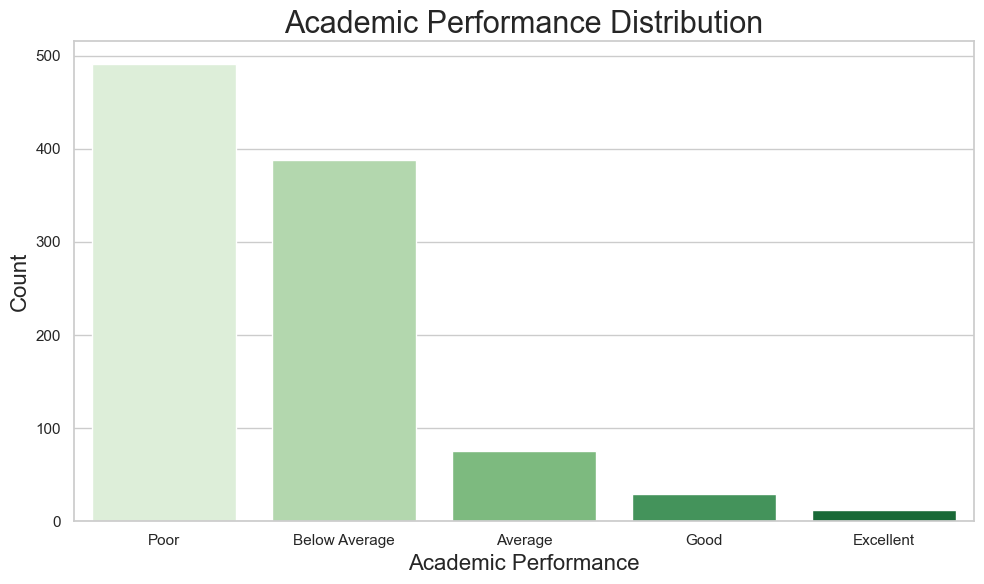

In [ ]:

# EDA: Academic Performance Distribution

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clean_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out/clean_dataset.csv"
t = pd.read_csv(clean_path)

acad_order = ["Poor", "Below Average", "Average", "Good", "Excellent"]
sns.set(style="whitegrid", rc={"axes.titlesize":22, "axes.labelsize":16})
plt.figure(figsize=(10,6))
sns.countplot(data=t, x="academic_performance", order=acad_order, palette="Greens")
plt.title("Academic Performance Distribution")
plt.xlabel("Academic Performance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


/var/folders/3v/32nqqfz923b6r07wcgtx3s6r0000gn/T/ipykernel_32530/3254540410.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/var/folders/3v/32nqqfz923b6r07wcgtx3s6r0000gn/T/ipykernel_32530/3254540410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


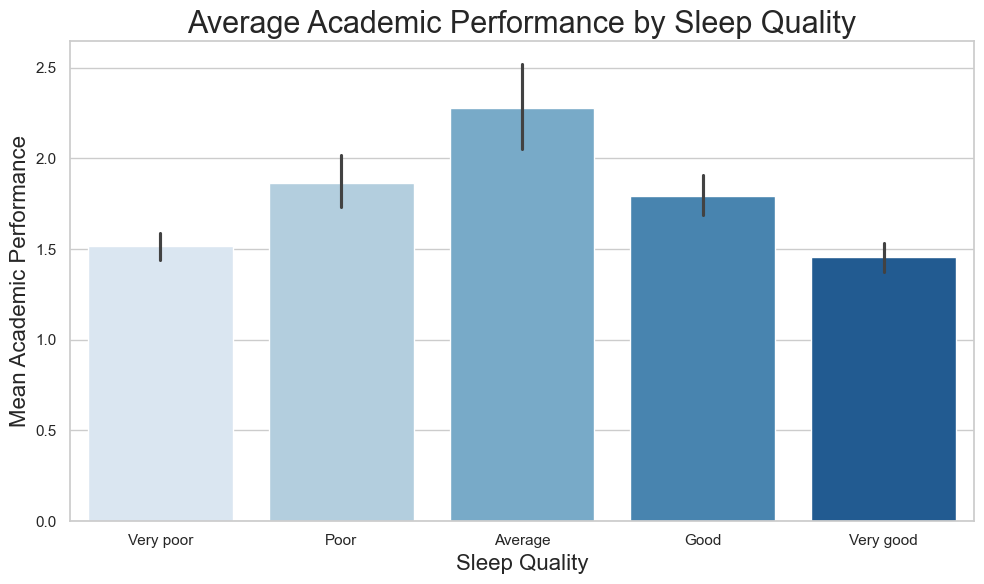

In [ ]:

# EDA: Mean Academic Performance by Sleep Quality

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clean_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out/clean_dataset.csv"
t = pd.read_csv(clean_path)

order = ["Very poor", "Poor", "Average", "Good", "Very good"]
sns.set(style="whitegrid", rc={"axes.titlesize":22, "axes.labelsize":16})
plt.figure(figsize=(10,6))
sns.barplot(
    data=t, x="sleep_quality", y="acad_perf_ord",
    order=order, palette="Blues", ci=95, estimator=np.mean
)
plt.title("Average Academic Performance by Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Mean Academic Performance")
plt.tight_layout()
plt.show()


/var/folders/3v/32nqqfz923b6r07wcgtx3s6r0000gn/T/ipykernel_32530/228745510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


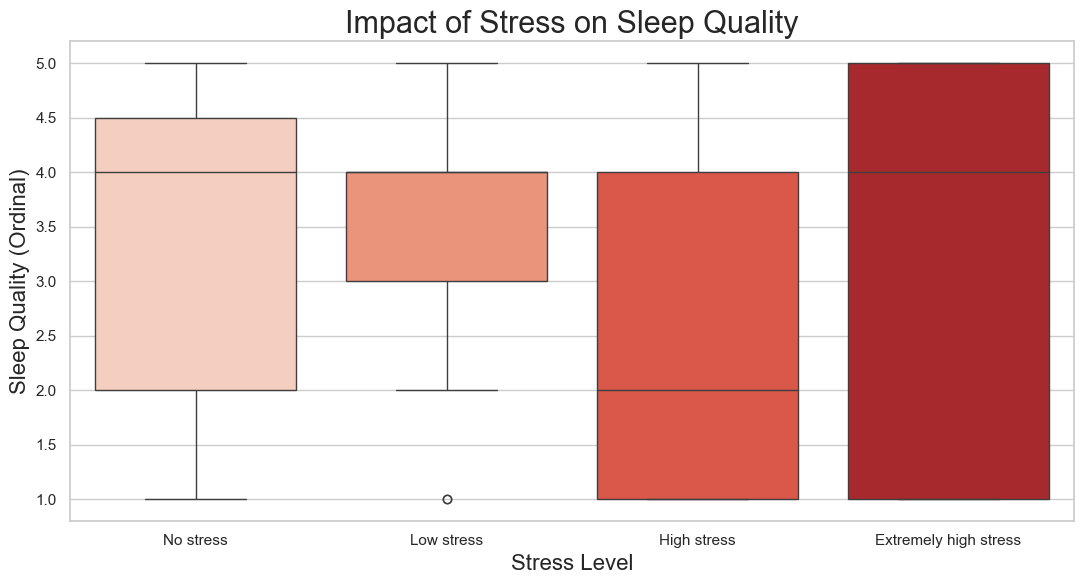

In [ ]:

# EDA: Impact of Stress on Sleep Quality (Boxplot)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clean_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out/clean_dataset.csv"
t = pd.read_csv(clean_path)

stress_order = ["No stress", "Low stress", "High stress", "Extremely high stress"]
sns.set(style="whitegrid", rc={"axes.titlesize":22, "axes.labelsize":16})
plt.figure(figsize=(11,6))
sns.boxplot(
    data=t, x="stress", y="sleep_quality_ord",
    order=stress_order, palette="Reds"
)
plt.title("Impact of Stress on Sleep Quality")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Quality (Ordinal)")
plt.tight_layout()
plt.show()


/var/folders/3v/32nqqfz923b6r07wcgtx3s6r0000gn/T/ipykernel_32530/3987709787.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


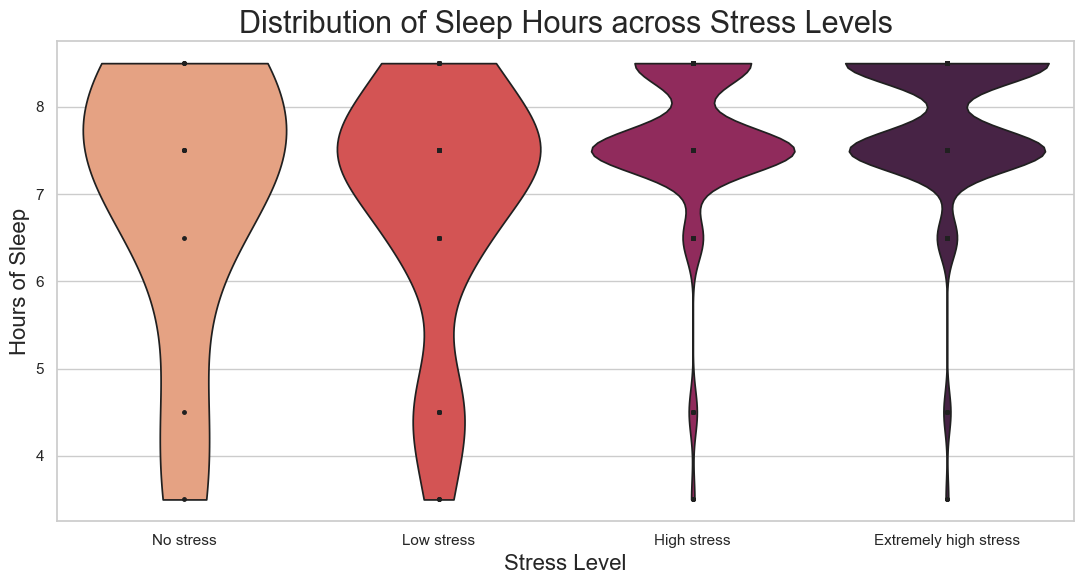

In [ ]:

# EDA: Distribution of Sleep Hours across Stress Levels (Violin)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clean_path = "/Users/muthuraj/Desktop/git hub/Mind-Metrics/insomnia_out/clean_dataset.csv"
t = pd.read_csv(clean_path)

stress_order = ["No stress", "Low stress", "High stress", "Extremely high stress"]
sns.set(style="whitegrid", rc={"axes.titlesize":22, "axes.labelsize":16})
plt.figure(figsize=(11,6))
sns.violinplot(
    data=t, x="stress", y="sleep_hours",
    order=stress_order, inner="point", cut=0, palette="rocket_r"
)
plt.title("Distribution of Sleep Hours across Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Hours of Sleep")
plt.tight_layout()
plt.show()
